In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [7]:
status_values = {
    1:'ok',
    2:'default',
    0:'unk'
}


df.status = df.status.map(status_values)

In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
df.income.max()

99999999

In [12]:
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [13]:
for d in ['income','assets','debt']:
    df[d] = df[d].replace(to_replace=99999999, value=np.nan).max()

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
df.isnull().any()

status       False
seniority    False
home         False
time         False
age          False
marital      False
records      False
job          False
expenses     False
income       False
assets       False
debt         False
amount       False
price        False
dtype: bool

In [16]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [17]:
 df = df[df.status != 'unk'].reset_index(drop=True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [20]:
df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
951,default,10,owner,36,36,married,no,freelance,75,959.0,300000.0,30000.0,1000,1400
688,default,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
2233,ok,1,parents,48,40,married,no,fixed,75,959.0,300000.0,30000.0,1320,1600
3304,default,1,parents,48,23,single,no,partime,35,959.0,300000.0,30000.0,1078,1079
2271,ok,5,owner,36,46,married,no,freelance,60,959.0,300000.0,30000.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,ok,18,private,36,45,married,no,fixed,45,959.0,300000.0,30000.0,800,1600
1784,ok,7,private,60,29,married,no,fixed,60,959.0,300000.0,30000.0,1000,1290
808,ok,1,parents,24,19,single,no,fixed,35,959.0,300000.0,30000.0,400,600
1857,ok,15,owner,48,43,married,no,freelance,60,959.0,300000.0,30000.0,2500,2976


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [23]:
del df_train['status']
del df_val['status']
del df_test['status']

In [24]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,959.0,300000.0,30000.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,959.0,300000.0,30000.0,1320,1600
3,1,parents,48,23,single,no,partime,35,959.0,300000.0,30000.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,959.0,300000.0,30000.0,1100,1897


In [25]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else: 
            return 'default'

In [26]:
xi = df_train.iloc[0].to_dict()

In [27]:
assess_risk(xi)

'ok'

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [29]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [30]:
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'own

In [31]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [135]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [136]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [137]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [138]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6322382601535443

In [139]:
roc_auc_score(y_val, y_pred)

0.6322382601535443

In [140]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [141]:
roc_auc_score(y_train, y_pred)

1.0

In [142]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [143]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)

In [144]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('val:', auc)

train: 0.6685264343319367
val: 0.7054989859726213


In [145]:
from sklearn.tree import export_text

In [149]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [150]:
from sklearn.tree import export_graphviz

In [151]:
print(export_graphviz(dt, feature_names=dv.get_feature_names()))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="records=yes <= 0.5\ngini = 0.398\nsamples = 2672\nvalue = [1940, 732]"] ;
1 [label="job=partime <= 0.5\ngini = 0.334\nsamples = 2206\nvalue = [1738, 468]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.282\nsamples = 1978\nvalue = [1642, 336]"] ;
1 -> 2 ;
3 [label="gini = 0.488\nsamples = 228\nvalue = [96, 132]"] ;
1 -> 3 ;
4 [label="seniority <= 6.5\ngini = 0.491\nsamples = 466\nvalue = [202, 264]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.418\nsamples = 269\nvalue = [80, 189]"] ;
4 -> 5 ;
6 [label="gini = 0.472\nsamples = 197\nvalue = [122, 75]"] ;
4 -> 6 ;
}


In [152]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [153]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [154]:
Ts = [0, 2000, 3000,4000, 5000, 8000]

In [155]:
from IPython.display import display

In [156]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets >= T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64



In [157]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [158]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [159]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [160]:
for feature, Ts in thresholds.items():
    print('####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] >= T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()
    print('####################')
    
    

####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

####################
####################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

####################


In [161]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.713
   4 -> 0.719
   5 -> 0.738
   6 -> 0.747
  10 -> 0.672
  15 -> 0.645
  20 -> 0.645
None -> 0.625


In [162]:
scores = []

for p in [1,2,3, 4,5,6,10,15,20, None]:
    dt=DecisionTreeClassifier(max_depth=p)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (p, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.713
   4 -> 0.719
   5 -> 0.738
   6 -> 0.747
  10 -> 0.682
  15 -> 0.646
  20 -> 0.643
None -> 0.633


In [163]:
for p in [4,5,6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt=DecisionTreeClassifier(max_depth=p, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s ,%3d) -> %.3f' % (p, s, auc))

   4 ,  1) -> 0.719
   4 ,  2) -> 0.719
   4 ,  5) -> 0.719
   4 , 10) -> 0.719
   4 , 15) -> 0.717
   4 , 20) -> 0.718
   4 ,100) -> 0.726
   4 ,200) -> 0.725
   4 ,500) -> 0.674
   5 ,  1) -> 0.738
   5 ,  2) -> 0.738
   5 ,  5) -> 0.736
   5 , 10) -> 0.735
   5 , 15) -> 0.730
   5 , 20) -> 0.732
   5 ,100) -> 0.734
   5 ,200) -> 0.735
   5 ,500) -> 0.674
   6 ,  1) -> 0.747
   6 ,  2) -> 0.746
   6 ,  5) -> 0.745
   6 , 10) -> 0.742
   6 , 15) -> 0.741
   6 , 20) -> 0.747
   6 ,100) -> 0.747
   6 ,200) -> 0.743
   6 ,500) -> 0.674


In [164]:
scores = []
for p in [4,5,6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt=DecisionTreeClassifier(max_depth=p, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((p, s, auc))

In [165]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.718991
1,4,2,0.718991
2,4,5,0.718991
3,4,10,0.718991
4,4,15,0.717093


In [166]:
df_scores.sort_values(by='auc', ascending=False )

,max_depth,min_samples_leaf,auc
19,6,2,0.747990
24,6,100,0.747297
23,6,20,0.746958
18,6,1,0.746676
20,6,5,0.744736
25,6,200,0.742619
21,6,10,0.742087
22,6,15,0.740676
10,5,2,0.737800
9,5,1,0.737667


In [167]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.719  0.738  0.747
2                 0.719  0.738  0.748
5                 0.719  0.737  0.745
10                0.719  0.735  0.742
15                0.717  0.730  0.741
20                0.718  0.732  0.747
100               0.726  0.734  0.747
200               0.725  0.735  0.743
500               0.674  0.674  0.674

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

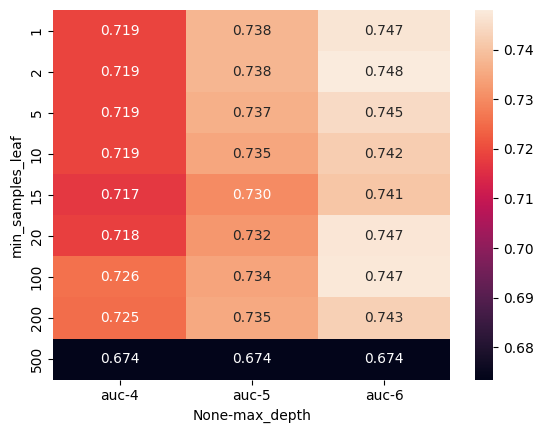

In [168]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [169]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [173]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- home=owner <= 0.50
|   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- home=parents >  0.50
|   |   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- home=owner >  0.50
|   |   |   |   |--- expenses <= 52.50
|   |   |   |   |   |--- p

In [174]:

scores_1 = []

for p in [4,5,6,7,10,15,20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt=DecisionTreeClassifier(max_depth=p, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores_1.append((p, s, auc))

In [179]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores_1 = pd.DataFrame(scores_1, columns=columns)
df_scores_1.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.718991
1,4.0,2,0.718991
2,4.0,5,0.718991
3,4.0,10,0.718991
4,4.0,15,0.717093


In [180]:
df_scores_1.sort_values(by='auc', ascending=False )

,max_depth,min_samples_leaf,auc
33,7.0,100,0.750775
19,6.0,2,0.748093
24,6.0,100,0.747297
23,6.0,20,0.746958
18,6.0,1,0.746667
...,...,...,...
64,NaN,2,0.657770
46,15.0,2,0.657437
54,20.0,1,0.638959
45,15.0,1,0.637012


In [181]:
df_scores_pivot_1 = df_scores_1.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], values=['auc'])
df_scores_pivot_1.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.636  0.719  0.738  0.747  0.732  0.680  0.637  0.639
2                 0.658  0.719  0.738  0.748  0.722  0.684  0.657  0.658
5                 0.688  0.719  0.736  0.744  0.733  0.711  0.698  0.690
10                0.716  0.719  0.735  0.742  0.729  0.716  0.716  0.716
15                0.727  0.717  0.730  0.740  0.730  0.730  0.729  0.729
20                0.729  0.718  0.732  0.747  0.740  0.727  0.730  0.729
100               0.746  0.726  0.734  0.747  0.751  0.746  0.746  0.746
200               0.743  0.725  0.735  0.743  0.743  0.743  0.743  0.743
500               0.674  0.674  0.674  0.674  0.674  0.674  0.674  0.674

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

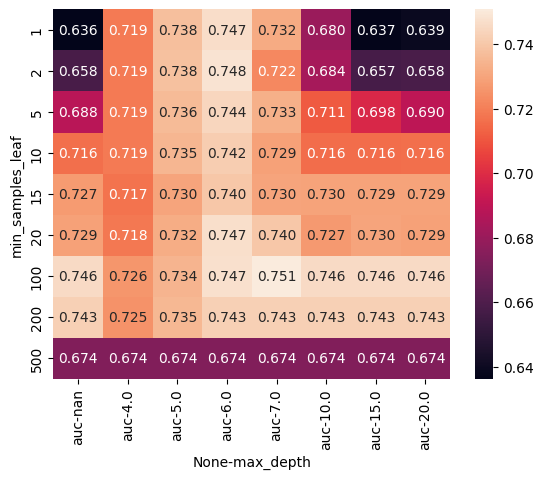

In [182]:
sns.heatmap(df_scores_pivot_1, annot=True, fmt='.3f')

In [183]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [186]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- home=owner <= 0.50
|   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- home=parents >  0.50
|   |   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- home=owner >  0.50
|   |   |   |   |--- expenses <= 52.50
|   |   |   |   |   |--- p

## Ensembles and random forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [189]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

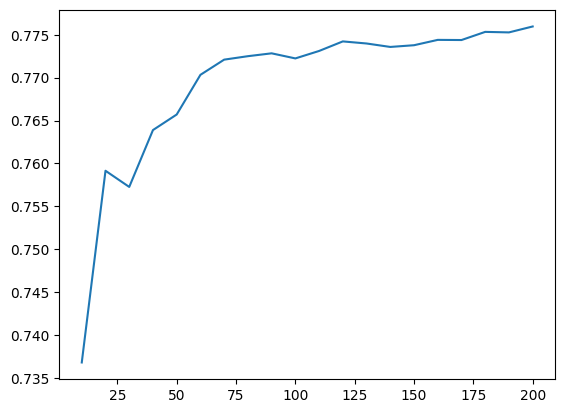

In [190]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [191]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [192]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

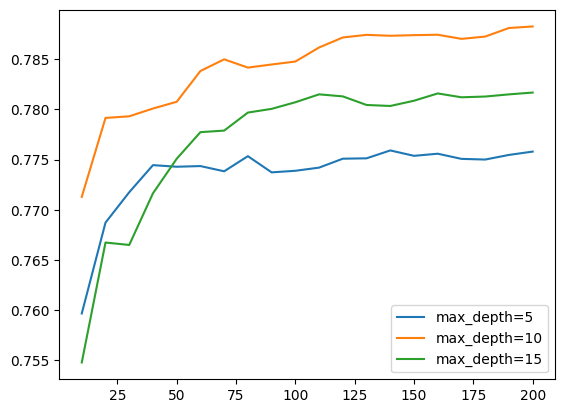

In [193]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [194]:
max_depth = 15

In [195]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [196]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

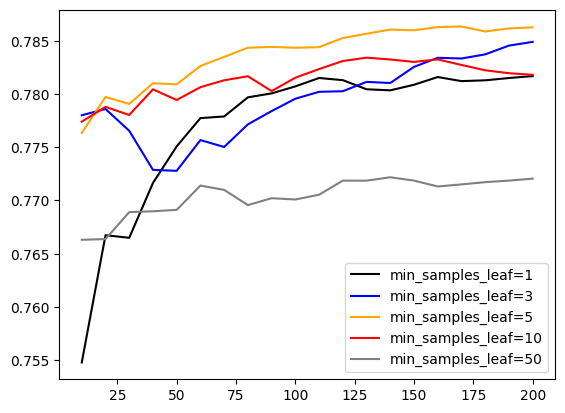

In [197]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [198]:
min_samples_leaf = 3

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

### Gradient boosting and XGBoost

In [86]:
import xgboost as xgb

In [199]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [200]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [201]:
y_pred = model.predict(dval)

In [202]:
roc_auc_score(y_val, y_pred)

0.7722990482187402

In [203]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [204]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [205]:
s = output.stdout

In [206]:
print(s[:200])

[0]	train-auc:0.83792	val-auc:0.74510
[5]	train-auc:0.90297	val-auc:0.77163
[10]	train-auc:0.93026	val-auc:0.77343
[15]	train-auc:0.94939	val-auc:0.77196
[20]	train-auc:0.96017	val-auc:0.77045
[25]	tr


In [207]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [208]:
df_score = parse_xgb_output(output)

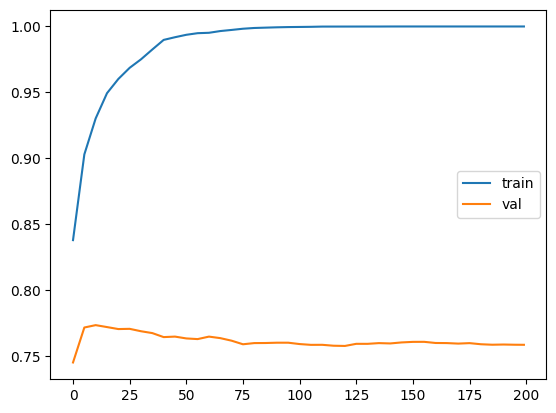

In [209]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

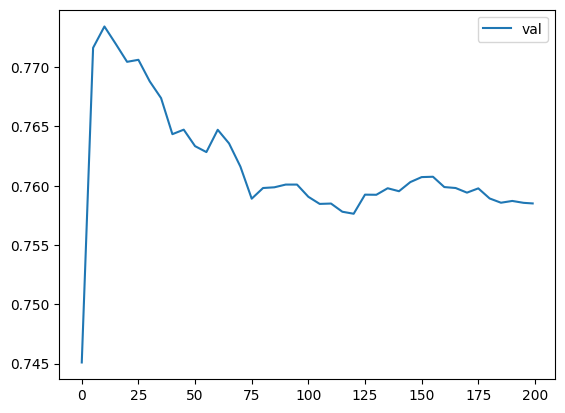

In [210]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [211]:
scores = {}

In [212]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [213]:
scores = {}

In [214]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [215]:
scores = {}

In [239]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 11,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [240]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=11'

In [241]:
del scores['max_depth=11']

In [235]:
scores.items()

dict_items([('max_depth=10',     num_iter  train_auc  val_auc
0          0    0.90272  0.74478
1          5    0.92531  0.74801
2         10    0.95181  0.75280
3         15    0.96765  0.75616
4         20    0.97894  0.75607
5         25    0.98634  0.75785
6         30    0.99152  0.75766
7         35    0.99437  0.76016
8         40    0.99634  0.76240
9         45    0.99749  0.76348
10        50    0.99841  0.76484
11        55    0.99880  0.76490
12        60    0.99936  0.76422
13        65    0.99971  0.76263
14        70    0.99981  0.76206
15        75    0.99988  0.76332
16        80    0.99994  0.76373
17        85    0.99996  0.76366
18        90    0.99998  0.76361
19        95    0.99999  0.76330
20       100    0.99999  0.76238
21       105    0.99999  0.76194
22       110    1.00000  0.76265
23       115    1.00000  0.76261
24       120    1.00000  0.76231
25       125    1.00000  0.76270
26       130    1.00000  0.76254
27       135    1.00000  0.76298
28       140  

In [237]:
max_depth

'max_depth=10'

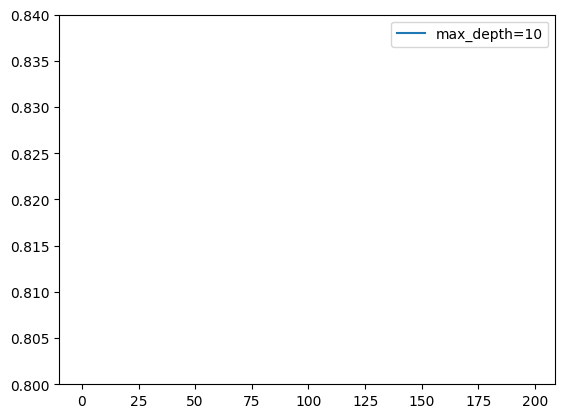

In [242]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.5, 0.84)
plt.legend()

In [243]:
scores = {}


In [244]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [110]:
scores = {}

In [245]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [246]:
scores = {}

In [247]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [248]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [249]:
del scores['max_depth=10']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


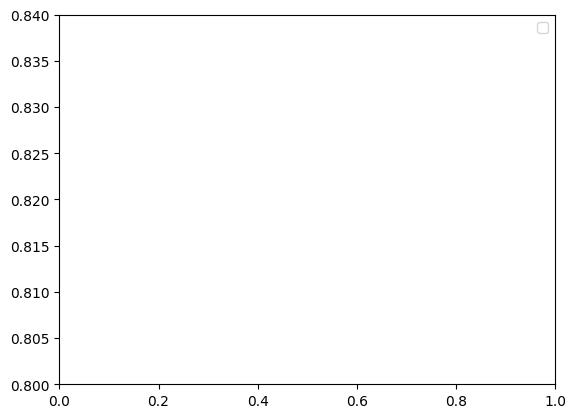

In [250]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()


In [117]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Selecting the final Model

In [118]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [119]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7406759342229541

In [120]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [121]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7879834588651281

In [122]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [123]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7973256884066746

In [124]:
df_full_train = df_full_train.reset_index(drop=True)

In [125]:
y_full_train = (df_full_train.status == 'default').astype(int).values


In [126]:
del df_full_train['status']

In [127]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [257]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

C:\Users\gh611680\Anaconda3\envs\DSdigi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [254]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [255]:
y_pred = model.predict(dtest)

In [256]:
roc_auc_score(y_test, y_pred)

0.7978165778798689

In [259]:
import bentoml
bentoml.xgboost.save_model("credit_model", model, 
                           custom_objects={
                               "dictVectorizer": dv
                           })

Model(tag="credit_model:rgg7cp2tu26r3wea", path="C:\Users\gh611680\bentoml\models\credit_model\rgg7cp2tu26r3wea\")